<div style="color:#00BFFF">

---

##### Data Normalization


<div style="color:#FF7F50">

**Normalize the Dataset**

</div>

The goal of normalization is to transform the dataset to a common scale without distorting differences in the ranges of values. This process is essential for accurate comparisons and analyses across different economic indicators.

For each variable, we adjust the data such that it has a mean ($\mu$) of zero and a standard deviation ($\sigma$) of one. This standardization technique, often referred to as Z-score normalization, is mathematically represented as follows:

$$Z = \frac{(X - \mu)}{\sigma}$$

Where:

- $X$ is the original value.
- $\mu$ is the mean of the variable.
- $\sigma$ is the standard deviation of the variable.
- $Z$ is the standardized (normalized) value.

Let us first visualise the data before normalisation. using our `plot_dataset` function. 

<div style="color:dodgerblue">

**SIDE note:** 

In this section of explore the functionality of the `plot_dataset` function, a versatile tool for visual inspection of various economic indicators over time. This function is part of our utility suite in the `utils/visualisation` folder and plays a crucial role in our iterative analysis process.



**Function Overview:** The plot_dataset function is designed for repeated use, allowing for dynamic exploration of different datasets or subsets thereof. Its primary purpose is to visually inspect the temporal evolution of economic indicators, including any transformations applied to the dataset.
</div>

**Key Features**

- **Dynamic Index Conversion:** The function accommodates indices in the 'YYYYQX' format, converting them into datetime objects for proper time series plotting. This feature ensures compatibility with datasets indexed by quarters.

- **Random Column Selection:** To facilitate a broad yet manageable inspection, the function randomly selects three columns for plotting alongside the PCE (Personal Consumption Expenditures) indicator. This approach provides a snapshot of the dataset's overall behavior without overwhelming the user with too much information at once.

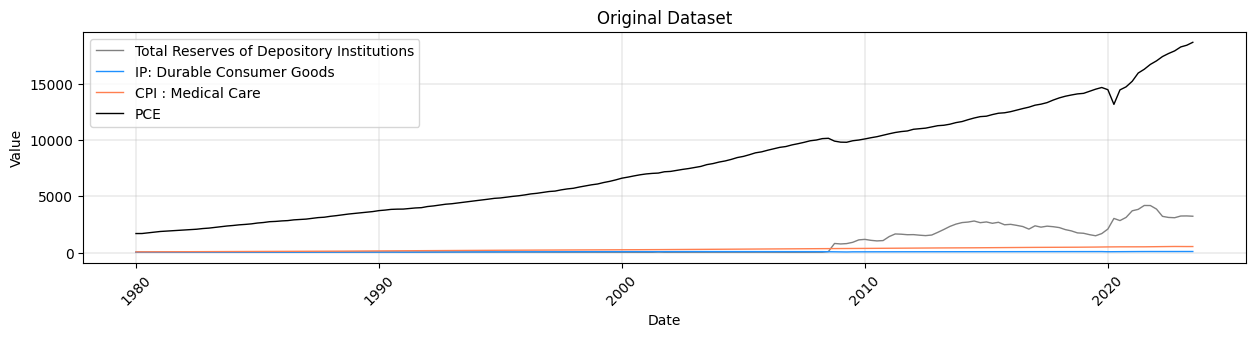

In [ ]:
from utils.visualisation import plot_dataset

#Can iterative rerun to see random results for inspection
plot_dataset(joined_dataset, "Original Dataset")

<div style="color:#FF7F50">

**Applying Z-Score Normalization**

</div>

- Utilizing the `StandardScaler` from `sklearn.preprocessing`, we apply Z-score normalization to the dataset, focusing on numeric columns.

- This ensures that each variable contributes equally to the analysis, centering the data around 0 and standardizing the distribution to have a variance of 1.

- Such normalization is crucial for multivariate analyses, including regression models and other advanced techniques.

This step effectively prepares the dataset for further statistical modeling and analysis, ensuring that all financial figures are presented in a format that allows for meaningful comparison and interpretation.


In [ ]:
# ##### Standardizing rate of change dataframe (Z-Score Normalization)
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it and applying this only to the numeric columns
scaled_data = scaler.fit_transform(
    joined_dataset.select_dtypes(include=["float64", "int64"])
)

# Create a new DataFrame with the scaled data and the same index and columns
joined_dataset = pd.DataFrame(
    scaled_data,
    index=joined_dataset.index,
    columns=joined_dataset.select_dtypes(include=["float64", "int64"]).columns,
)

joined_dataset.head(2)

,PCE,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,"Housing Starts, Northeast","Housing Starts, Midwest","Housing Starts, South","Housing Starts, West",New Private Housing Permits (SAAR),"New Private Housing Permits, Northeast (SAAR)","New Private Housing Permits, Midwest (SAAR)","New Private Housing Permits, South (SAAR)","New Private Housing Permits, West (SAAR)",New Orders for Durable Goods,New Orders for Nondefense Capital Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Sentiment Index,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks
1980-01-01,-1.370499,-1.493072,-1.552661,-1.528520,-1.558604,-1.386999,-1.592311,-1.8